# DCA0133 - Aprendizagem de Máquina e Mineração de Dados
### Trabalho 1 - Unidade 1 - Filtro anti-spam
* Aluno: Fernando Lucas
* Matrícula: 20220080534

### Importação das Bibliotecas

In [131]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura e Quantidade de dados do dataset utilizado:

In [132]:
data = pd.read_csv('./spam.csv', encoding='latin-1')
data.shape


(5572, 2)

### Breve demonstração dos dados:

In [133]:
data['Category'] = data['Category'].replace({'ham': 'Não Spam', 'spam': 'Spam'})
data.head(n=10)

,Category,Message
0,Não Spam,"Go until jurong point, crazy.. Available only ..."
1,Não Spam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Não Spam,U dun say so early hor... U c already then say...
4,Não Spam,"Nah I don't think he goes to usf, he lives aro..."
5,Spam,FreeMsg Hey there darling it's been 3 week's n...
6,Não Spam,Even my brother is not like to speak with me. ...
7,Não Spam,As per your request 'Melle Melle (Oru Minnamin...
8,Spam,WINNER!! As a valued network customer you have...
9,Spam,Had your mobile 11 months or more? U R entitle...


### Função que faz o pré-processamento das mensagens


*   Retira a pontuação das palavras;
*   Remove outros caracteres especiais que podem atrapalhar;



In [134]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
def processaTexto(texto):
    #remove pontuação caractere a caractere
    nopunc = [char for char in texto if char not in string.punctuation]
    #junta os caracteres em palavras novamente
    nopunc = ''.join(nopunc)

    #nopunc.split() separa cada frase em palavras, retirando as que estão dentro de stopwords
    #word.lower() torna todas as letras minúsculas
    #essa linha remove as stopwords, retornando apenas as palavras relevantes para a análise
    cleanWords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    return cleanWords



### Divisão do conjunto de dados

* Dados de treinamento: 80%;
* Dados de teste: 20%;

In [136]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

### Vetorização das mensagens
* Etapa necessária para que a máquina consiga entender as mensagens de forma clara;
* Utilizando o ***CountVectorizer()*** é possível fazer todo o processo desde a tokenização até a matriz de ocorrências de cada palavra dentro de uma mensagem;
* O ***CountVectorizer()*** faz a vetorização das mensagens colocando em uma matriz de ocorrências em que a linha é uma mensagem e cada coluna uma palavra e sua quantidade numa determinada mensagem;

In [137]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

### Classificador Naive-Bayes

* Utilização da função ***MultinomialNB*** que é útil para projetos que precisam de cálculos probabilísticos em dados multinomiais;
* Simula um classificador de Bayes;
* Nessa etapa, ocorre o treinamento do classificador através dessa função;


In [138]:
clf = MultinomialNB();
clf.fit(X_train_counts, y_train)

MultinomialNB()

### Teste e Desempenho

* Índice de Precisão: proporção das mensagens positivas em relação as que foram previstas como positivas;
* Índice de Recall: proporção das mensagens positivas em relação as que realmente são positivas;
* Índice de F1-score: é a média harmônica entre os índices de precisão e recall;
* Índice de Support: Mostra a quantidade de dados utilizados no teste;


              precision    recall  f1-score   support

    Não Spam       0.99      1.00      1.00       966
        Spam       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



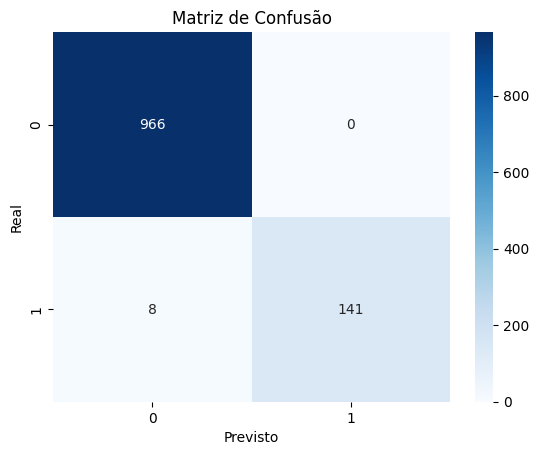

In [139]:
y_pred = clf.predict(X_test_counts)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## Mineração de dados

* Apresentação em gráficos dos dados para melhor entendimento;

### Gráfico de Pizza
* Porcentagem e Quantidade de mensagens por classe;

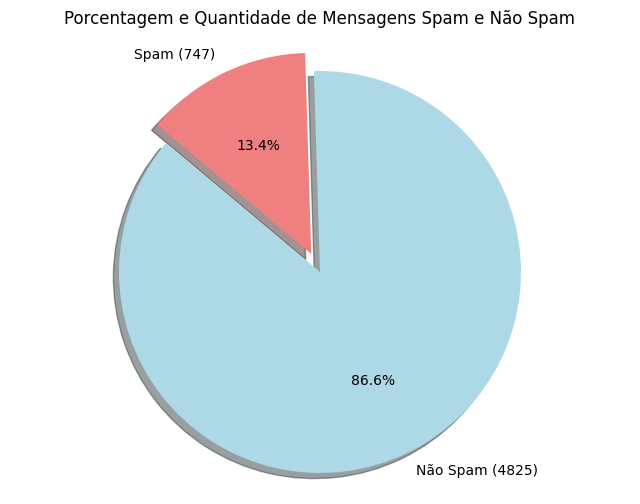

In [140]:
class_counts = data['Category'].value_counts()

labels = [f"{label} ({count})" for label, count in zip(class_counts.index, class_counts.values)]
sizes = class_counts.values
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentagem e Quantidade de Mensagens Spam e Não Spam')
plt.axis('equal')
plt.show()


* Porcentagem e Quantidade dos dados classificados como Spam;

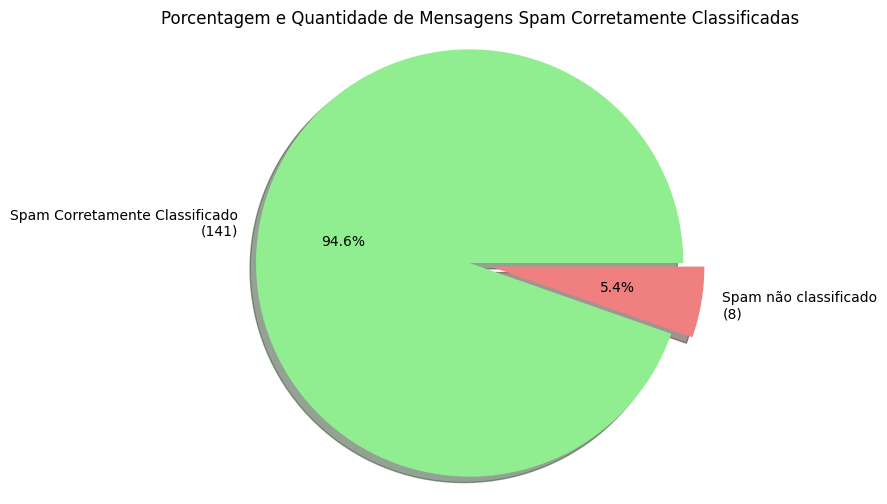

In [141]:
#criar dataFrame da predição
data_predicoes = pd.DataFrame({'Real': y_test, 'Predicao': y_pred})

# número de verdadeiros positivos (mensagens que eram spam e foram classificadas corretamente como spam)
true_positives = data_predicoes[(data_predicoes['Real'].str.lower() == 'spam') & (data_predicoes['Predicao'].str.lower() == 'spam')].shape[0]

# número de falsos negativos (mensagens que eram spam e não foram classificadas corretamente como spam)
false_negatives = data_predicoes[(data_predicoes['Real'].str.lower() == 'spam') & (data_predicoes['Predicao'].str.lower() != 'spam')].shape[0]

# Total de mensagens que realmente eram spam
total_messages_spam = data_predicoes[data_predicoes['Real'].str.lower() == 'spam'].shape[0]

# Preparar os dados para o gráfico de pizza
labels = [f'Spam Corretamente Classificado\n({true_positives})', f'Spam não classificado\n({false_negatives})']
sizes = [true_positives, false_negatives]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

# Plotar o gráfico de pizza
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Porcentagem e Quantidade de Mensagens Spam Corretamente Classificadas')
plt.axis('equal')
plt.show()

### Análise das Mensagens Classificadas Errôneamente (Falso Negativo)

* Gráfico de Barras;
* Demonstração da diferença entre os dados de: treinamento, teste e errôneos;

In [142]:
X_test_counts = vectorizer.transform(X_train)

# Calcular a soma das contagens de palavras em todas as mensagens de teste
word_counts = X_test_counts.sum(axis=0)

# Obter os nomes das palavras (features)
feature_names = vectorizer.get_feature_names_out()

# Criar um DataFrame com as contagens de palavras
word_counts_df = pd.DataFrame({'Palavra': feature_names, 'Contagem': word_counts.flat})

# Ordenar o DataFrame pelas contagens em ordem decrescente
word_counts_df = word_counts_df.sort_values(by='Contagem', ascending=False)

# Selecionar as 'n' palavras mais frequentes
n_palavras_frequentes = 10
top_palavras_treinamento = word_counts_df.head(n_palavras_frequentes)


In [143]:
X_test_counts = vectorizer.transform(X_test)

# Calcular a soma das contagens de palavras em todas as mensagens de teste
word_counts = X_test_counts.sum(axis=0)

# Obter os nomes das palavras (features)
feature_names = vectorizer.get_feature_names_out()

# Criar um DataFrame com as contagens de palavras
word_counts_df = pd.DataFrame({'Palavra': feature_names, 'Contagem': word_counts.flat})

# Ordenar o DataFrame pelas contagens em ordem decrescente
word_counts_df = word_counts_df.sort_values(by='Contagem', ascending=False)

# Selecionar as 'n' palavras mais frequentes
n_palavras_frequentes = 10
top_palavras_teste = word_counts_df.head(n_palavras_frequentes)

In [144]:
data_predicoes['Classificacao Correta'] = data_predicoes['Real'] == data_predicoes['Predicao']

# Filtrar o DataFrame para selecionar apenas as mensagens classificadas incorretamente
mensagens_incorretas = data.loc[data_predicoes[data_predicoes['Classificacao Correta'] == False].index]
mensagens_incorretas = mensagens_incorretas['Message']

y_pred_counts = vectorizer.transform(mensagens_incorretas)

# Calcular a soma das contagens de palavras em todas as mensagens de teste
word_counts = y_pred_counts.sum(axis=0)

# Obter os nomes das palavras (features)
feature_names = vectorizer.get_feature_names_out()

# Criar um DataFrame com as contagens de palavras
word_counts_df = pd.DataFrame({'Palavra': feature_names, 'Contagem': word_counts.flat})

# Ordenar o DataFrame pelas contagens em ordem decrescente
word_counts_df = word_counts_df.sort_values(by='Contagem', ascending=False)

# Selecionar as 'n' palavras mais frequentes
n_palavras_frequentes = 10
top_palavras_incorretas = word_counts_df.head(n_palavras_frequentes)

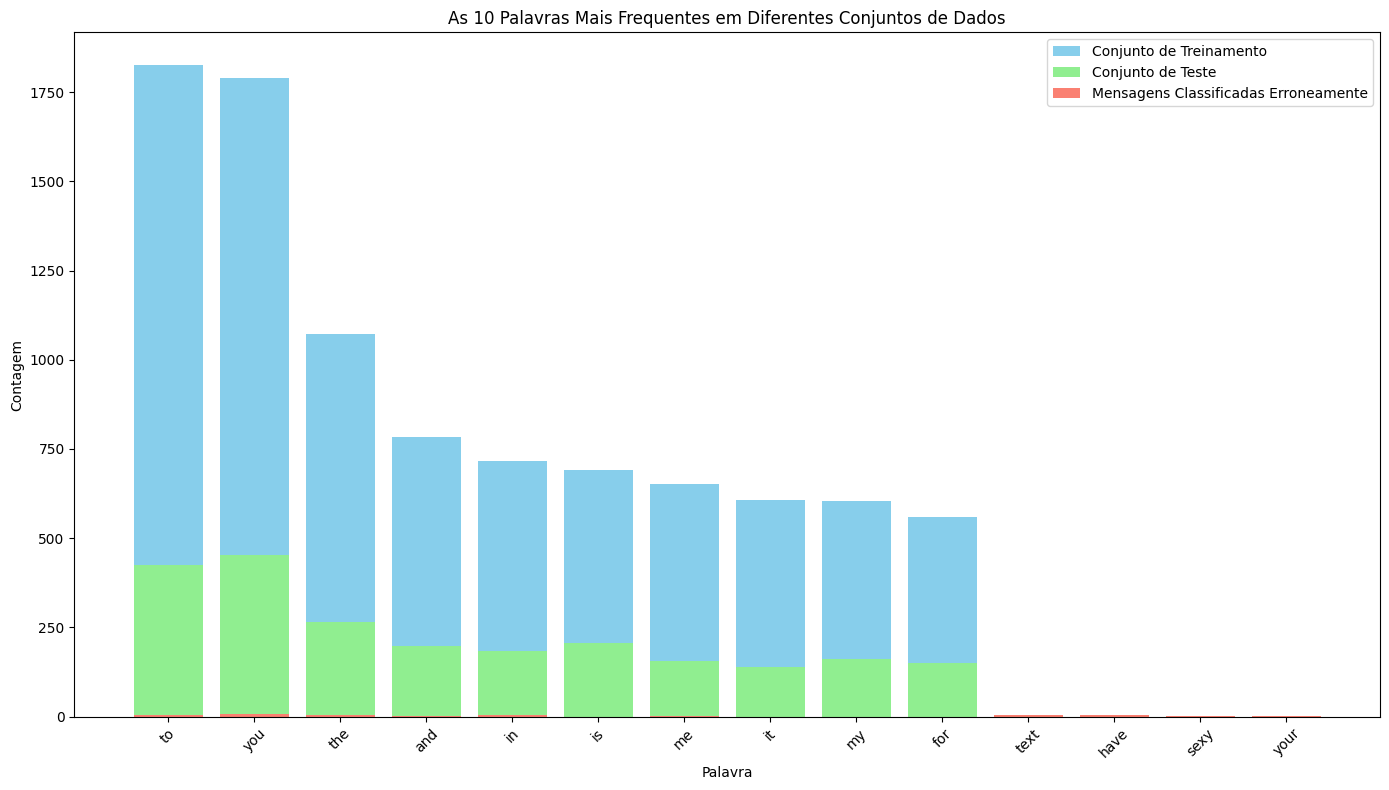

In [146]:
# Definir as cores para cada conjunto de dados
cores = ['skyblue', 'lightgreen', 'salmon']

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar as barras para o conjunto de treinamento
ax.bar(top_palavras_treinamento['Palavra'], top_palavras_treinamento['Contagem'], color=cores[0], label='Conjunto de Treinamento')

# Plotar as barras para o conjunto de teste
ax.bar(top_palavras_teste['Palavra'], top_palavras_teste['Contagem'], color=cores[1], label='Conjunto de Teste')

# Plotar as barras para as mensagens classificadas erroneamente
ax.bar(top_palavras_incorretas['Palavra'], top_palavras_incorretas['Contagem'], color=cores[2], label='Mensagens Classificadas Erroneamente')

# Adicionar legenda
ax.legend()

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45)

# Adicionar rótulos e título
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('As 10 Palavras Mais Frequentes nos Diferentes Conjuntos de Dados')

# Exibir o gráfico
plt.tight_layout()
plt.show()

